In [286]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


In [287]:
acoes = {
    'ITAUSA':yf.Ticker('ITSA4.SA'),
    'VALE':yf.Ticker('VALE3.SA'),
    'B3':yf.Ticker('B3SA3.SA'),
    'FLEURY':yf.Ticker('FLRY3.SA'),
    'BANCO DO BRASIL':yf.Ticker('BBAS3.SA'),
    'HYPERA':yf.Ticker('HYPE3.SA'),
    'RAIA DROGASIL':yf.Ticker('RADL3.SA'),
    'WEG':yf.Ticker('WEGE3.SA'),
    'PETROBRAS':yf.Ticker('PETR4.SA'),
    'ALUPAR':yf.Ticker('ALUP11.SA'),
    'COPEL':yf.Ticker('CPLE6.SA'),
    'MULTIPLAN':yf.Ticker('MULT3.SA'),
    'TELEFÔNICA':yf.Ticker('VIVT3.SA'),
    'AMBEV':yf.Ticker('ABEV3.SA'),
    'ENGIE':yf.Ticker('EGIE3.SA'),
    'SABESP':yf.Ticker('SBSP3.SA'),
    'BTG PACTUAL':yf.Ticker('BPAC11.SA'),
    'BRF':yf.Ticker('BRFS3.SA'),
    'EZTEC':yf.Ticker('EZTC3.SA'),
    'AREZZO':yf.Ticker('ARZZ3.SA')
}

In [288]:
acoes_portifolio ={
    'WEG':yf.Ticker('WEGE3.SA'),
    'VALE':yf.Ticker('VALE3.SA'),
    'TELEFÔNICA':yf.Ticker('VIVT3.SA'),
    'RAIA DROGASIL':yf.Ticker('RADL3.SA'),
    'SABESP':yf.Ticker('SBSP3.SA')
    }

In [289]:
data_acoes = []
for acao in acoes_portifolio:
    data = {}
    data['Ação'] = acao
    data['Valor investido'] = 1000
    data['Quantidade'] = data['Valor investido'] / acoes[acao].history(period='5y').iloc[0]['Close']
    data['Valor final'] = data['Quantidade'] * acoes[acao].history(period='5y').iloc[-1]['Close']
    data['Rentabilidade geral'] = (data['Valor final'] / data['Valor investido'] - 1)
    data['Valor por dia'] = data['Quantidade'] * acoes[acao].history(period='5y')['Close']
    data['Rentabilidade diária'] = data['Valor por dia'].ffill(axis=0).pct_change()
    data['Desvio padrão diário'] = data['Rentabilidade diária'].std()
    data['Índice Sharpee'] = data['Rentabilidade geral'] / data['Desvio padrão diário']
    data_acoes.append(data)



In [292]:
portifolio = 0
for i in range(len(data_acoes)):
    portifolio += data_acoes[i]['Valor por dia']
portifolio

Date
2018-09-20 00:00:00-03:00     4999.999946
2018-09-21 00:00:00-03:00     5073.719085
2018-09-24 00:00:00-03:00     4970.821181
2018-09-25 00:00:00-03:00     5016.509058
2018-09-26 00:00:00-03:00     5000.748065
                                 ...     
2023-09-14 00:00:00-03:00    12331.732037
2023-09-15 00:00:00-03:00    12240.431574
2023-09-18 00:00:00-03:00    12238.131090
2023-09-19 00:00:00-03:00    12251.173969
2023-09-20 00:00:00-03:00    12251.087147
Name: Close, Length: 1240, dtype: float64

In [293]:
# portifolio = 0
# portifolio += data_acoes[7]['Valor por dia'] # WEG - Setor de equipamentos eletrônicos
# portifolio += data_acoes[1]['Valor por dia'] # VALE - Setor de mineração
# portifolio += data_acoes[12]['Valor por dia'] # TELEFÔNICA - Setor de telecomunicações
# portifolio += data_acoes[6]['Valor por dia'] # RAIA DROGASIL - Setor de farmácias
# portifolio += data_acoes[15]['Valor por dia'] # SABESP - Setor de saneamento básico
# portifolio

In [294]:
df_corr = pd.DataFrame()
df_corr['Portifolio'] = portifolio.ffill(axis=0).pct_change() # Rentabilidade diária do portifolio
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária'] # Escolhi a WEG para ser a referência
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária'] # VALE foi a segunda ação do portifolio pois tem uma correlação baixa com o portifolio
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária']
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária'] # RAIA DROGASIL foi a quarta ação do portifolio pois tem uma correlação baixa com o portifolio
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # TELEFÔNICA foi a terceira ação do portifolio pois tem uma correlação baixa com o portifolio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['SABESP'] = data_acoes[15]['Rentabilidade diária'] # SABESP foi a quinta ação do portifolio pois tem uma correlação baixa com o portifolio
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['BRF'] = data_acoes[17]['Rentabilidade diária'] # BRF apresenta a menor correlação com o portifolio, porém não é uma ação muito rentável
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portifolio com as outras ações

IndexError: list index out of range

<Axes: title={'center': 'Correlação do Portifolio com as outras ações'}>

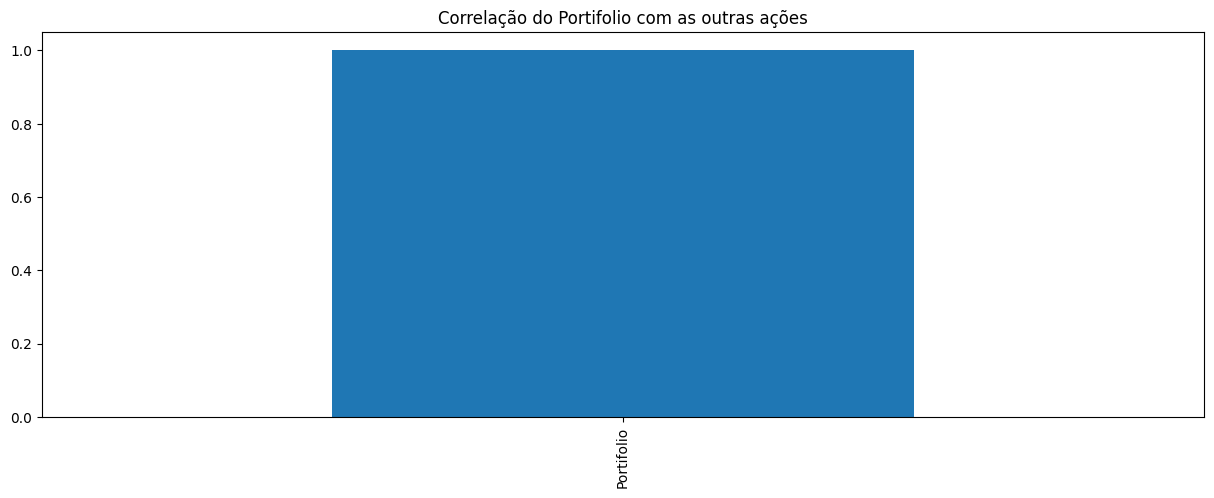

In [295]:
df_corr.corr().iloc[0].plot(kind='bar', figsize=(15,5), title='Correlação do Portifolio com as outras ações')

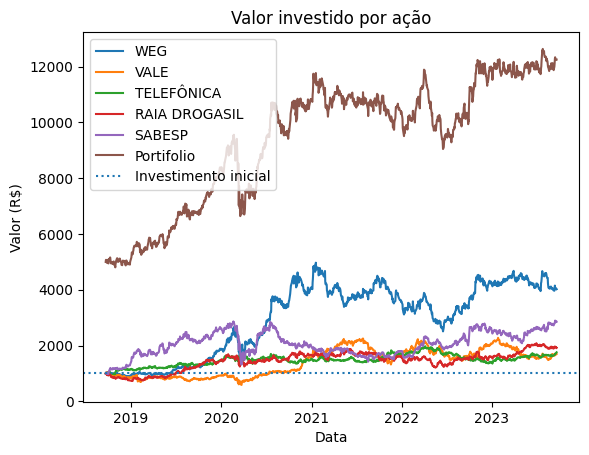

In [296]:
plt.figure()
for i in range(len(data_acoes)):
    plt.plot(data_acoes[i]['Valor por dia'], label=data_acoes[i]['Ação'])
plt.plot(portifolio, label='Portifolio')
plt.axhline(data['Valor investido'], linestyle=':', label='Investimento inicial')
plt.title('Valor investido por ação')
plt.ylabel('Valor (R\$)')
plt.xlabel('Data')
plt.legend()
plt.show()

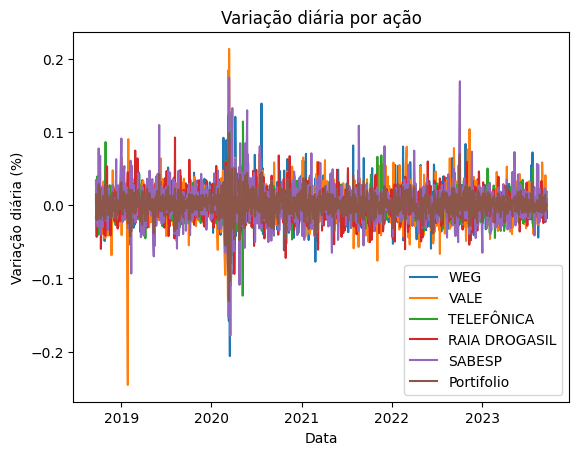

In [297]:
plt.figure()
for i in range(len(data_acoes)):
    plt.plot(data_acoes[i]['Rentabilidade diária'], label=data_acoes[i]['Ação'])
plt.plot(portifolio.ffill(axis=0).pct_change(), label='Portifolio')
plt.title('Variação diária por ação')
plt.ylabel('Variação diária (%)')
plt.xlabel('Data')
plt.legend()
plt.show()

In [298]:
for acao in data_acoes:
    print(acao['Ação'])
    print('Valor investido: R$ {:.2f}'.format(acao['Valor investido']))
    print('Valor final: R$ {:.2f}'.format(acao['Valor final']))
    print('Rentabilidade geral: {:.2f}%'.format(acao['Rentabilidade geral'] * 100))
    print('Índice Sharpee: {:.2f}'.format(acao['Índice Sharpee']))
    print('')
print('Portifolio')
print('Valor investido: R$ {:.2f}'.format(1000 * len(data_acoes)))
print('Valor final: R$ {:.2f}'.format(portifolio.iloc[-1]))
print('Rentabilidade geral: {:.2f}%'.format((portifolio.iloc[-1] / (1000 * len(data_acoes)) - 1) * 100)) 
print('Índice Sharpee: {:.2f}'.format((portifolio.iloc[-1] / (1000 * len(data_acoes)) - 1) / portifolio.ffill(axis=0).pct_change().std()))


WEG
Valor investido: R$ 1000.00
Valor final: R$ 4021.73
Rentabilidade geral: 302.17%
Índice Sharpee: 126.47

VALE
Valor investido: R$ 1000.00
Valor final: R$ 1696.04
Rentabilidade geral: 69.60%
Índice Sharpee: 27.13

TELEFÔNICA
Valor investido: R$ 1000.00
Valor final: R$ 1759.18
Rentabilidade geral: 75.92%
Índice Sharpee: 43.53

RAIA DROGASIL
Valor investido: R$ 1000.00
Valor final: R$ 1919.28
Rentabilidade geral: 91.93%
Índice Sharpee: 45.21

SABESP
Valor investido: R$ 1000.00
Valor final: R$ 2854.85
Rentabilidade geral: 185.49%
Índice Sharpee: 71.93

Portifolio
Valor investido: R$ 5000.00
Valor final: R$ 12251.09
Rentabilidade geral: 145.02%
Índice Sharpee: 93.55
